In [4]:
# Imports
import re # Regex - Regular expressions for matching words/characters
import json
import timeit
import numpy as np
from scipy import sparse
from collections import Counter
import matplotlib.pyplot as plt
from pylab import *
from NDSparseTensor import NDSparseTensor

texts = ["Pride and Prejudice", "Nils Holgersson", "Moby Dick", "Emma", "Havsbadet"]

In [5]:
def load(text_name):    
    frequencies_loaded = {}
    for m in range(1, 10):
        with open(f'frequencies/{text_name} m{m}.json', 'r', encoding="utf8") as f:
            json_text = f.read()

            frequencies_loaded[m] = NDSparseTensor.fromjson(json_text)

    with open(f'frequencies/{text_name} unique symbols.json', 'r', encoding="utf-8") as f:
        unique_symbols = json.load(f)
    return frequencies_loaded, unique_symbols

In [6]:
figure(1)
for text in texts:
    frequencies_loaded, unique_symbols = load(text)
    frequencies = frequencies_loaded[1].normalize().todense()
    indecies = np.argsort(frequencies)
    indecies = indecies[:-10:-1]
    cla()
    bar([unique_symbols[x] for x in indecies], frequencies[indecies])
    title(f'Frequency distribution: {text}')

    savefig(f"plots/Frequency {text}.png")
    print(text, 'saved')


Pride and Prejudice saved
Nils Holgersson saved


KeyboardInterrupt: 

In [7]:
def calculate_correlation_information(m, frequencies):
    k = 0

    if m == 1:
        frequencies[1].normalize()
        n_unique = len(unique_symbols)

        for key, value in frequencies[m].getnonzero():
            k += value * np.log2(value * n_unique)
        return k

    for i in frequencies.keys():
        frequencies[i].normalize()

    for key, value in frequencies[m].getnonzero():
        sequence_1m  = key
        sequence_1m1 = key[:-1]
        sequence_2m1 = key[1:-1]
        sequence_2m  = key[1:]

        p_1m  = frequencies[m][sequence_1m]
        p_1m1 = frequencies[m-1][sequence_1m1]
        p_2m1 = frequencies[m-2][sequence_2m1] if m > 2 else 1
        p_2m  = frequencies[m-1][sequence_2m]

        a = p_1m * np.log2(p_1m * p_2m1 / p_1m1 / p_2m)
        k += a
    return k



In [9]:
text_correlations = {}
for text in texts:
    frequencies_loaded, unique_symbols = load(text)

    ks = {}
    for m in range(1, 10):
        ks[m] = calculate_correlation_information(m, frequencies_loaded)
    text_correlations[text] = ks

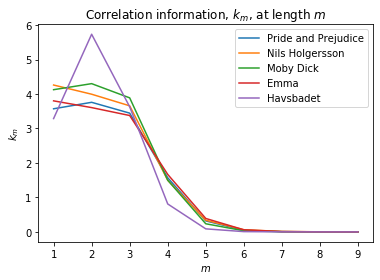

In [14]:
figure(1)
for text, ks in text_correlations.items():
    km = [x for x in ks.values()]
    m = [x for x in ks.keys()]
    plot(m, km, label=text)

title(f"Correlation information, $k_m$, at length $m$")
ylabel('$k_m$')
xlabel('$m$')
legend()

savefig(f"plots/Correlation Information {text}.png")